In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import sklearn
import nltk
import re
import string

In [11]:

# Text processing and analysis
from textblob import TextBlob
from nltk.corpus import stopwords

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Machine Learning
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [2]:
data = pd.read_csv("spam.csv", encoding="ISO-8859-1")

create dataframe

In [3]:
df =pd.DataFrame(data)
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


DATA CLEANING 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

Delete Unwanted Column

In [6]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [8]:
df.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


"""Rename the columns"""

In [14]:
df.columns =["class","mail"]
df= df.drop_duplicates()
df.head(5)

,class,mail
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df.shape

(5169, 2)

Class Distribution (Spam vs non-spam)

class
ham     4516
spam     653
Name: count, dtype: int64


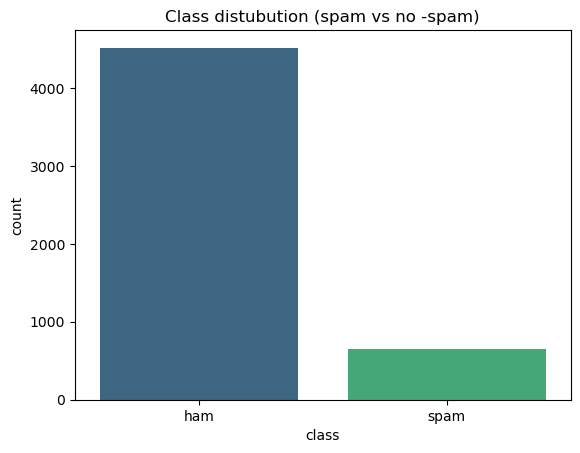

In [18]:
sns.countplot(x="class", data =df,palette="viridis")
plt.title("Class distubution (spam vs no -spam)")
plt.xlabel("class")
plt.ylabel("count")
print(df['class'].value_counts())

Observations:
The dataset is imbalanced, with a majority of messages being ham (not spam).
This will be important when training a machine learning model, as class imbalance can impact performance.

Encoding Class Variable:
We convert the class column to numerical values where:

0 represents ham (not spam)
1 represents spam

In [20]:
encoder=LabelEncoder()
encoder.fit_transform(df["class"])
df["class"]=encoder.fit_transform(df["class"])
df.head(5)

,class,mail
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


Text Cleaning Function

In [29]:
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\W+', ' ', text)  # remove punctuation
    text = re.sub(r'\s+', ' ', text)  # remove extra spaces
    words = text.split()
    words = [w for w in words if w not in stop_words]  # remove stopwords
    words = [stemmer.stem(w) for w in words]           # stemming
    return ' '.join(words)



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
df['mail'] = df['mail'].apply(clean_text)
df.head()

,class,mail
0,0,go jurong point crazi avail bugi n great world...
1,0,ok lar joke wif u oni
2,1,free entri 2 wkli comp win fa cup final tkt 21...
3,0,u dun say earli hor u c alreadi say
4,0,nah think goe usf live around though


In [35]:
# Vectorization: Text → Numeric

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=3000, stop_words='english')

X = vectorizer.fit_transform(df['mail'])
Y = df["class"]

Train Test Split
X = vectorizer.fit_transform(df['mail'])
Y = df["class"]


In [36]:
from sklearn.model_selection import train_test_split
X_train ,X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2)

MODELS AND THERE CONFUSION MATRIX AND ACCURACY SCORE 

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

MODEL 1- lOGISTIC REGRESSION

In [53]:
model1 =LogisticRegression()
model1.fit(X_train,Y_train)
Y_pred =model1.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Accuracy
lr_acc= accuracy_score(Y_test,Y_pred)
print("Accuracy:", lr_acc)

# Confusion Matrix
cm = confusion_matrix(Y_test,Y_pred)
print("Confusion Matrix:\n",cm)

# Classification Report (Precision, Recall, F1)

print("Classification Report:\n",classification_report(Y_test,Y_pred))



Accuracy: 0.9642166344294004
Confusion Matrix:
 [[901   1]
 [ 36  96]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       902
           1       0.99      0.73      0.84       132

    accuracy                           0.96      1034
   macro avg       0.98      0.86      0.91      1034
weighted avg       0.97      0.96      0.96      1034



MODEL 2 = RANDOM FOREST CLASSIFIER

In [54]:
model2= RandomForestClassifier()
model2.fit(X_train,Y_train)
Y_pred= model2.predict(X_test)

rr_acc=accuracy_score(Y_test,Y_pred)
print("Accuracy:", rr_acc)
# Confusion Matrix
cm = confusion_matrix(Y_test,Y_pred)
print("Confusion Matrix:\n",cm)

# Classification Report (Precision, Recall, F1)

print("Classification Report:\n",classification_report(Y_test,Y_pred))

Accuracy: 0.97678916827853
Confusion Matrix:
 [[900   2]
 [ 22 110]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       902
           1       0.98      0.83      0.90       132

    accuracy                           0.98      1034
   macro avg       0.98      0.92      0.94      1034
weighted avg       0.98      0.98      0.98      1034



Model3 =MultinomialNB

In [56]:
model3= MultinomialNB()
model3.fit(X_train,Y_train)
Y_pred=model3.predict(X_test)
mn_acc= accuracy_score(Y_test,Y_pred)
print("Accuracy:", mn_acc)

# Confusion Matrix
cm = confusion_matrix(Y_test,Y_pred)
print("Confusion Matrix:\n",cm)

# Classification Report (Precision, Recall, F1)

print("Classification Report:\n",classification_report(Y_test,Y_pred))

Accuracy: 0.9738878143133463
Confusion Matrix:
 [[901   1]
 [ 26 106]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       902
           1       0.99      0.80      0.89       132

    accuracy                           0.97      1034
   macro avg       0.98      0.90      0.94      1034
weighted avg       0.97      0.97      0.97      1034



Model 4 = SVC

In [57]:
model4= SVC()
model4.fit(X_train,Y_train)
Y_pred=model4.predict(X_test)
svc_acc= accuracy_score(Y_test,Y_pred)
print("Accuracy:", svc_acc)

# Confusion Matrix
cm = confusion_matrix(Y_test,Y_pred)
print("Confusion Matrix:\n",cm)

# Classification Report (Precision, Recall, F1)

print("Classification Report:\n",classification_report(Y_test,Y_pred))


Accuracy: 0.9796905222437138
Confusion Matrix:
 [[902   0]
 [ 21 111]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       902
           1       1.00      0.84      0.91       132

    accuracy                           0.98      1034
   macro avg       0.99      0.92      0.95      1034
weighted avg       0.98      0.98      0.98      1034



NOW WE WILL COMPARE THE MODEL AND WILL TRY TO FIND THE BEST MODEL

In [59]:
result = {"LogisticRegression":lr_acc ," RandomForestClassifier": rr_acc,"SVC":svc_acc, "MultinomialNB":mn_acc}
result

{'LogisticRegression': 0.9642166344294004,
 ' RandomForestClassifier': 0.97678916827853,
 'SVC': 0.9796905222437138,
 'MultinomialNB': 0.9738878143133463}

In [60]:
best_model= max(result,key=result.get)
print(f"Best Model: {best_model}, accuracy:{result[best_model]}")

Best Model: SVC, accuracy:0.9796905222437138


VISUAL COMAPARISION OF MODEL 

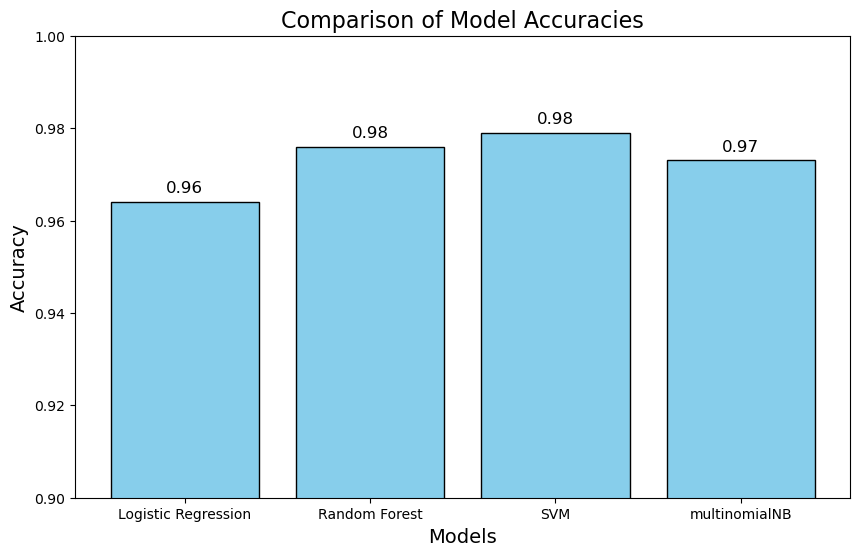

In [61]:
# Replace the below dictionary with your actual accuracy scores
model_accuracies = {
    'Logistic Regression': 0.964,
    'Random Forest': 0.976,
    'SVM': 0.979,
    'multinomialNB': 0.973}

# Extract model names and accuracies
model_names = list(model_accuracies.keys())
accuracies = list(model_accuracies.values())

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Comparison of Model Accuracies', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.ylim(0.9, 1.0)  # Adjust limits for better visualization

# Add accuracy scores on top of the bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.002, f"{acc:.2f}", ha='center', fontsize=12)

# Display the plot
plt.show()
    